### Google Gemini Overview

uv add ipykernel

uv add google-genai

uv add pillow

## Initilization

In [13]:
from google import genai
import os
from getpass import getpass

# Configure the API key
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY") or getpass(
    "Enter Google API Key: "
)

client = genai.Client()

response = client.models.generate_content(
    model='gemini-2.0-flash-exp', contents='How does AI work?'
)
print(response.text)

Okay, let's break down how AI works, keeping it understandable without getting too lost in the technical weeds. At its core, AI is about creating systems that can perform tasks that typically require human intelligence. It's a broad field, so we'll touch on some of the key concepts.

**Think of AI as a Spectrum, Not a Single Thing**

It's important to understand that "AI" isn't a monolith. It encompasses a range of techniques and approaches, each suitable for different problems. Some common categories include:

*   **Machine Learning (ML):** This is the most prominent type of AI today. It's about training computers to learn from data without being explicitly programmed for every specific task.
*   **Deep Learning (DL):** A subfield of ML that uses artificial neural networks with many layers to learn complex patterns.
*   **Natural Language Processing (NLP):** Focuses on enabling computers to understand, interpret, and generate human language.
*   **Computer Vision:** Enables computers 

In [14]:
from google import genai

client = genai.Client(http_options={'api_version': 'v1alpha'})
model_id = "gemini-2.0-flash-exp"
config = {"response_modalities": ["TEXT"]}

message = "Hey Gemini!"

async with client.aio.live.connect(model=model_id, config=config) as session:
    print("> ", message, "\n")
    await session.send(message, end_of_turn=True)

    async for response in session.receive():
        print(response.text)

>  Hey Gemini! 

Hey
 there! How can I help you today? What's on your mind?


None


In [20]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(
    google_search = GoogleSearch()
)

response = client.models._generate_content(
    model=model_id,
    contents="When is the next total solar eclipse in the United States?",
    config=GenerateContentConfig(
        tools=[google_search_tool],
        response_modalities=["TEXT"],
    )
)

for each in response.candidates[0].content.parts:
    print(each.text)
# Example response:
# The next total solar eclipse visible in the contiguous United States will be on ...

# To get grounding metadata as web content.
print(response.candidates[0].grounding_metadata.search_entry_point.rendered_content)

The next total solar eclipse visible in the United States will occur on **March 30, 2033**, but it will only be visible in Alaska. The next total solar eclipse that will be visible in the contiguous United States is on **August 23, 2044**.

Here's a breakdown of the upcoming total solar eclipses in North America:

*   **March 30, 2033:** This total solar eclipse will be visible in Alaska, sweeping across the northwestern part of the state.
*   **August 23, 2044:** This eclipse will begin in Greenland, move through Canada, and then touch three U.S. states, Montana, North Dakota, and South Dakota, around sunset.
*   **August 12, 2045:** This total solar eclipse will cross the entirety of the United States, from northern California to Florida.

It's worth noting that while solar eclipses happen a few times a year, total solar eclipses are much rarer and the path of totality (where the sun is completely blocked by the moon) is very specific.

<style>
.container {
  align-items: center;
  b

In [25]:
from google.genai import types

In [26]:
model_name = "gemini-2.0-flash-exp"

In [27]:
bounding_box_system_instructions = """
    Return bounding boxes as a JSON array with labels. Never return masks or code fencing. Limit to 25 objects.
    If an object is present multiple times, name them according to their unique characteristic (colors, size, position, unique characteristics, etc..).
      """
     

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

In [59]:
from PIL import Image

import io
import os
import requests
from io import BytesIO

In [40]:
import json
import random
import io
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageColor

additional_colors = [colorname for (colorname, colorcode) in ImageColor.colormap.items()]

def plot_bounding_boxes(im, bounding_boxes):
    """
    Plots bounding boxes on an image with markers for each a name, using PIL, normalized coordinates, and different colors.

    Args:
        img_path: The path to the image file.
        bounding_boxes: A list of bounding boxes containing the name of the object
         and their positions in normalized [y1 x1 y2 x2] format.
    """

    # Load the image
    img = im
    width, height = img.size
    print(img.size)
    # Create a drawing object
    draw = ImageDraw.Draw(img)

    # Define a list of colors
    colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'orange',
    'pink',
    'purple',
    'brown',
    'gray',
    'beige',
    'turquoise',
    'cyan',
    'magenta',
    'lime',
    'navy',
    'maroon',
    'teal',
    'olive',
    'coral',
    'lavender',
    'violet',
    'gold',
    'silver',
    ] + additional_colors

    # We parse out the markdown fencing
    bounding_boxes = parse_json(bounding_boxes)

    # Iterate over the bounding boxes
    for i, bounding_box in enumerate(json.loads(bounding_boxes)):
      # Select a color from the list
      color = colors[i % len(colors)]

      # Convert normalized coordinates to absolute coordinates
      abs_y1 = int(bounding_box["box_2d"][0]/1000 * height)
      abs_x1 = int(bounding_box["box_2d"][1]/1000 * width)
      abs_y2 = int(bounding_box["box_2d"][2]/1000 * height)
      abs_x2 = int(bounding_box["box_2d"][3]/1000 * width)

      if abs_x1 > abs_x2:
        abs_x1, abs_x2 = abs_x2, abs_x1

      if abs_y1 > abs_y2:
        abs_y1, abs_y2 = abs_y2, abs_y1

      # Draw the bounding box
      draw.rectangle(
          ((abs_x1, abs_y1), (abs_x2, abs_y2)), outline=color, width=4
      )

      # Draw the text
      if "label" in bounding_box:
        draw.text((abs_x1 + 8, abs_y1 + 6), bounding_box["label"], fill=color)

    # Display the image
    img.show()

In [30]:
def parse_json(json_output):
    # We parse out the markdown fencing
    lines = json_output.splitlines()
    for i, line in enumerate(lines):
        if line == "```json":
            json_output = "\n".join(lines[i+1:])  # Remove everything before "```json"
            json_output = json_output.split("```")[0]  # Remove everything after the closing "```"
            break  # Exit the loop once "```json" is found
    return json_output

In [33]:
import requests

urls = [
   "https://storage.googleapis.com/generativeai-downloads/images/socks.jpg",
   "https://storage.googleapis.com/generativeai-downloads/images/vegetables.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/Japanese_Bento.png",
       "https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/origamis.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/fruits.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/cat.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/pumpkins.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/breakfast.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/bookshelf.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/spill.jpg"
   ]

filenames = [
       "Socks.jpg", "Vegetables.jpg", "Japanese_bento.png", "Cupcakes.jpg",
       "Origamis.jpg", "Fruits.jpg", "Cat.jpg", "Pumpkins.jpg",
       "Breakfast.jpg", "Bookshelf.jpg", "Spill.jpg"
   ]

for url, filename in zip(urls, filenames):
       response = requests.get(url)
       if response.status_code == 200:
           with open(filename, 'wb') as f:
               f.write(response.content)
       else:
           print(f"Failed to download {url}")

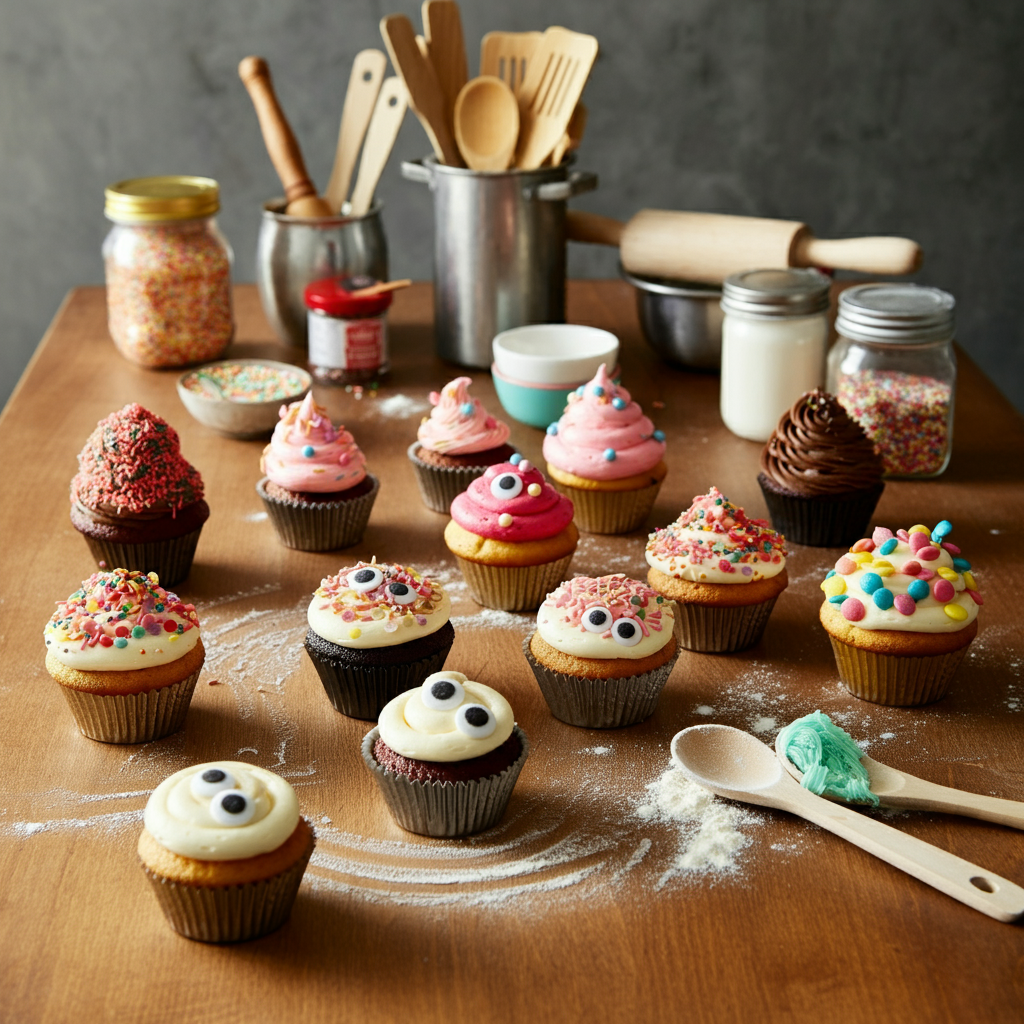

In [34]:
image = "Cupcakes.jpg" # @param ["Socks.jpg","Vegetables.jpg","Japanese_bento.png","Cupcakes.jpg","Origamis.jpg","Fruits.jpg","Cat.jpg","Pumpkins.jpg","Breakfast.jpg","Bookshelf.jpg", "Spill.jpg"] {"allow-input":true}

im = Image.open(image)
im

In [55]:
from IPython.display import Audio, display

# Assuming you have already converted your audio to 'Question.wav'
audio_path = 'Recording.wav'

# Display the audio player
display(Audio(audio_path))

In [57]:
import librosa
import numpy as np

prompt = "understand the audio and the question being asked within the audio, and try to answer the question, if you cannot understand the question, say you do not understand, if you cannot answer the question, say you don't know"

# Load the audio file
audio_path = 'Recording.wav'
audio_data, sample_rate = librosa.load(audio_path, sr=None)

# Example: Extract features (e.g., Mel spectrogram)
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

# Convert the Mel spectrogram to a format suitable for model input
# This step depends on the model's requirements
model_input = np.expand_dims(mel_spectrogram, axis=0)


print(model_input)
# Run the model (pseudo-code, replace with actual model call)
response = client.models.generate_content(
    model=model_name,
    contents=[prompt, Audio(audio_path).data],
    config=types.GenerateContentConfig(
        system_instruction=prompt,
        temperature=0.5,
        safety_settings=safety_settings,
    )
)

# Process the response
print(response)

[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.9311557e-03
   4.5438330e-03 1.7626291e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.8442493e-02
   4.0267939e-03 3.0482847e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.3472700e-02
   4.8591014e-02 3.0127034e-02]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.9369291e-09
   1.8175507e-08 6.3416060e-08]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.4426930e-09
   1.9695412e-08 6.5212575e-08]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.3054577e-09
   1.8383222e-08 6.3490944e-08]]]


ValidationError: 12 validation errors for _GenerateContentParameters
contents.list[union[Content,list[union[Part,is-instance[Image],str]],Part,is-instance[Image],str]].1.Content
  Input should be a valid dictionary or object to extract fields from [type=model_attributes_type, input_value=b'RIFFJ \r\x00WAVEJUNK\x1...xb0\xff\xb0\xff\xb0\xff', input_type=bytes]
    For further information visit https://errors.pydantic.dev/2.10/v/model_attributes_type
contents.list[union[Content,list[union[Part,is-instance[Image],str]],Part,is-instance[Image],str]].1.list[union[Part,is-instance[Image],str]]
  Input should be a valid list [type=list_type, input_value=b'RIFFJ \r\x00WAVEJUNK\x1...xb0\xff\xb0\xff\xb0\xff', input_type=bytes]
    For further information visit https://errors.pydantic.dev/2.10/v/list_type
contents.list[union[Content,list[union[Part,is-instance[Image],str]],Part,is-instance[Image],str]].1.Part
  Input should be a valid dictionary or object to extract fields from [type=model_attributes_type, input_value=b'RIFFJ \r\x00WAVEJUNK\x1...xb0\xff\xb0\xff\xb0\xff', input_type=bytes]
    For further information visit https://errors.pydantic.dev/2.10/v/model_attributes_type
contents.list[union[Content,list[union[Part,is-instance[Image],str]],Part,is-instance[Image],str]].1.is-instance[Image]
  Input should be an instance of Image [type=is_instance_of, input_value=b'RIFFJ \r\x00WAVEJUNK\x1...xb0\xff\xb0\xff\xb0\xff', input_type=bytes]
    For further information visit https://errors.pydantic.dev/2.10/v/is_instance_of
contents.list[union[Content,list[union[Part,is-instance[Image],str]],Part,is-instance[Image],str]].1.str
  Input should be a valid string, unable to parse raw data as a unicode string [type=string_unicode, input_value=b'RIFFJ \r\x00WAVEJUNK\x1...xb0\xff\xb0\xff\xb0\xff', input_type=bytes]
    For further information visit https://errors.pydantic.dev/2.10/v/string_unicode
contents.Content
  Input should be a valid dictionary or object to extract fields from [type=model_attributes_type, input_value=["understand the audio an...b0\xff\xb0\xff\xb0\xff'], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/model_attributes_type
contents.list[union[Part,is-instance[Image],str]].1.Part
  Input should be a valid dictionary or object to extract fields from [type=model_attributes_type, input_value=b'RIFFJ \r\x00WAVEJUNK\x1...xb0\xff\xb0\xff\xb0\xff', input_type=bytes]
    For further information visit https://errors.pydantic.dev/2.10/v/model_attributes_type
contents.list[union[Part,is-instance[Image],str]].1.is-instance[Image]
  Input should be an instance of Image [type=is_instance_of, input_value=b'RIFFJ \r\x00WAVEJUNK\x1...xb0\xff\xb0\xff\xb0\xff', input_type=bytes]
    For further information visit https://errors.pydantic.dev/2.10/v/is_instance_of
contents.list[union[Part,is-instance[Image],str]].1.str
  Input should be a valid string, unable to parse raw data as a unicode string [type=string_unicode, input_value=b'RIFFJ \r\x00WAVEJUNK\x1...xb0\xff\xb0\xff\xb0\xff', input_type=bytes]
    For further information visit https://errors.pydantic.dev/2.10/v/string_unicode
contents.Part
  Input should be a valid dictionary or object to extract fields from [type=model_attributes_type, input_value=["understand the audio an...b0\xff\xb0\xff\xb0\xff'], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/model_attributes_type
contents.is-instance[Image]
  Input should be an instance of Image [type=is_instance_of, input_value=["understand the audio an...b0\xff\xb0\xff\xb0\xff'], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/is_instance_of
contents.str
  Input should be a valid string [type=string_type, input_value=["understand the audio an...b0\xff\xb0\xff\xb0\xff'], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type

In [48]:
from io import BytesIO

prompt = "Detect the 2d bounding boxes around each white and black sweet on the cupcakes, if you cannot find it, don't guess (with “label” as description”)"  # @param {type:"string"}

# Load and resize image
img = Image.open(BytesIO(open(image, "rb").read()))
im = Image.open(image).resize((1024, int(1024 * img.size[1] / img.size[0])), Image.Resampling.LANCZOS)

# Run model to find bounding boxes
response = client.models.generate_content(
    model=model_name,
    contents=[prompt, im],
    config = types.GenerateContentConfig(
        system_instruction=bounding_box_system_instructions,
        temperature=0.5,
        safety_settings=safety_settings,
    )
)

# Check output
print(response.text)

```json
[
  {"box_2d": [678, 395, 712, 426], "label": "white sweet"},
  {"box_2d": [703, 423, 738, 460], "label": "white sweet"},
  {"box_2d": [677, 463, 711, 494], "label": "white sweet"},
  {"box_2d": [727, 453, 762, 488], "label": "white sweet"},
  {"box_2d": [708, 491, 741, 526], "label": "white sweet"},
  {"box_2d": [668, 432, 700, 466], "label": "white sweet"},
  {"box_2d": [701, 526, 735, 561], "label": "white sweet"},
  {"box_2d": [662, 499, 697, 532], "label": "white sweet"},
  {"box_2d": [688, 559, 720, 593], "label": "white sweet"},
  {"box_2d": [677, 591, 710, 625], "label": "white sweet"},
  {"box_2d": [654, 531, 687, 566], "label": "white sweet"},
  {"box_2d": [711, 566, 744, 601], "label": "white sweet"},
  {"box_2d": [729, 534, 762, 570], "label": "white sweet"},
  {"box_2d": [658, 566, 690, 599], "label": "white sweet"},
  {"box_2d": [714, 601, 748, 635], "label": "white sweet"},
  {"box_2d": [718, 368, 750, 405], "label": "white sweet"},
  {"box_2d": [686, 627, 720, 6

(1024, 1024)


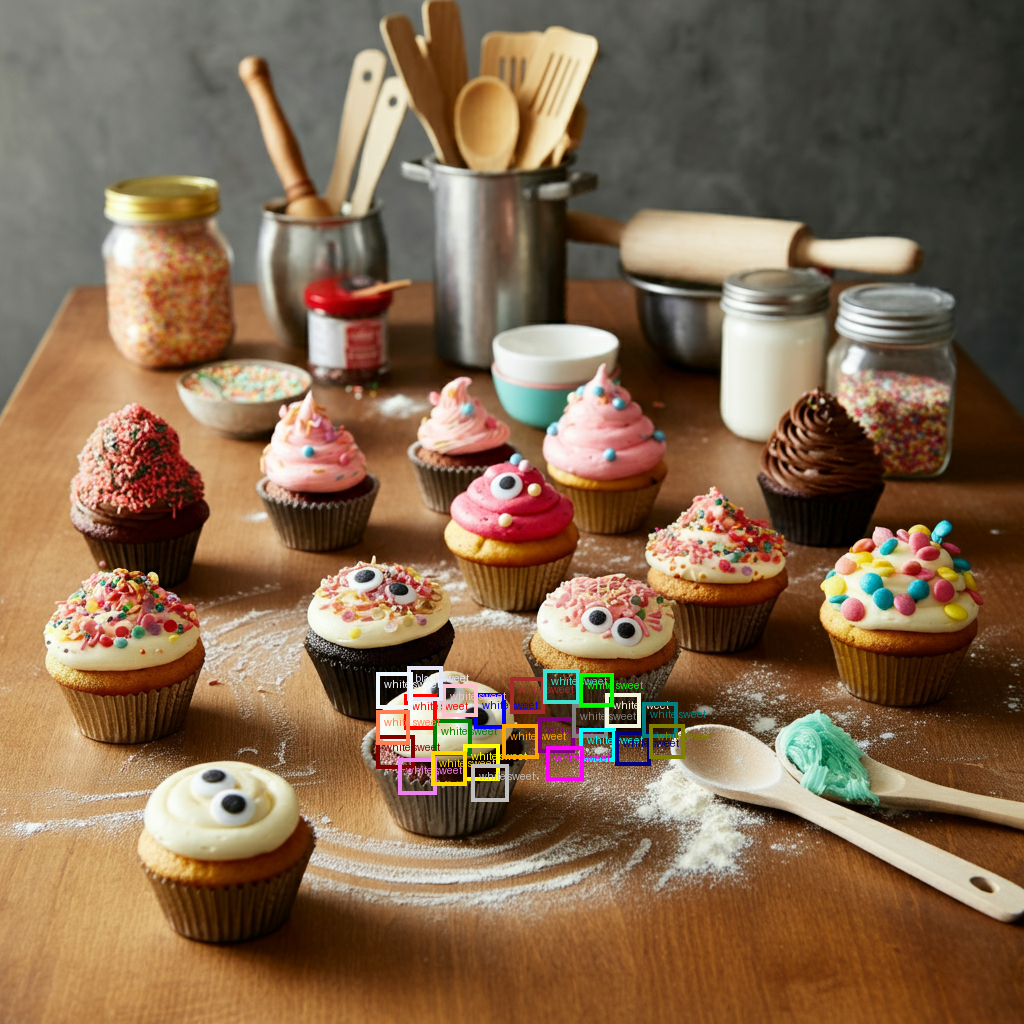

In [49]:
plot_bounding_boxes(im, response.text)
im

In [64]:
import json
from IPython.display import display, Audio

# Function to generate audio
def generate_audio():
    # Initialize the client
    client = genai.Client()  # Replace with actual client initialization if different

    # Check backend and print appropriate message
    if client.clientConfig.backend == 'VertexAI':
        print("Calling VertexAI.GenerateContent API...")
    else:
        print("Calling GeminiAI.GenerateContent API...")

    # Configure the request
    config = GenerateContentConfig()
    config.response_modalities=["AUDIO"]
    config.speech_config=genai.SpeechConfig(
            voice_config=genai.VoiceConfig(
                prebuilt_voice_config=genai.PrebuiltVoiceConfig(
                    voice_name="Aoede"
                )))
                
            
        
    

    # Call the GenerateContent method
    result = client.models.generate_content("gemini-2.0-flash-exp", "say something nice to me", config)

    # Convert the result to JSON and pretty-print it
    response = json.dumps(result, indent=2)
    print(response)

    # Assuming the result contains an audio file path or URL
    # Display the audio player
    audio_path = result.get('audio_path')  # Replace with actual key if different
    if audio_path:
        display(Audio(audio_path))

# Run the function
generate_audio()

AttributeError: 'Client' object has no attribute 'clientConfig'

In [66]:
def get_current_weather(location: str,) -> int:
  """Returns the current weather.

  Args:
    location: The city and state, e.g. San Francisco, CA
  """
  return 'sunny'

response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents="What is the weather like in Boston?",
    config=types.GenerateContentConfig(tools=[get_current_weather],)
)

response.text

'The weather in Boston is sunny.\n'

compute tokens not supported

In [67]:
response = client.models.count_tokens(
    model='gemini-2.0-flash-exp',
    contents='What is your name?',
)
print(response)

total_tokens=6 cached_content_token_count=None
